In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('data/train_data_tree.csv')

In [4]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [5]:
X = df.iloc[:,0:2]
y = df.num

In [6]:
X.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

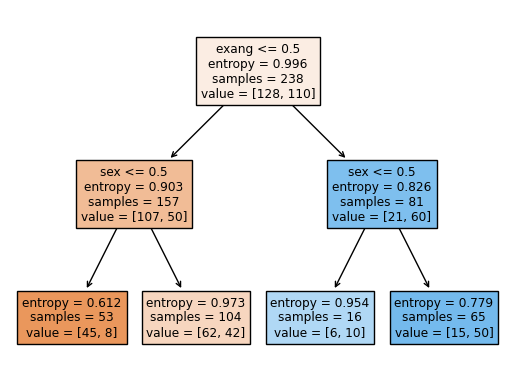

In [9]:
a = tree.plot_tree(clf, filled=True, feature_names=['sex', 'exang'])

In [10]:
0.996 - (157 * 0.903 + 81 * 0.826) / 238

0.11920588235294105

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
dt = DecisionTreeClassifier()

In [15]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
predicted = dt.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
metrics.precision_recall_fscore_support(y_test, predicted, average='micro')

(0.9736842105263158, 0.9736842105263158, 0.9736842105263158, None)

In [19]:
metrics.precision_score(y_test, predicted, average='macro')

0.9761904761904763

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In [22]:
clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
parametrs = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1,11)}

In [24]:
parametrs

{'max_depth': range(1, 11),
 'min_samples_split': range(2, 11),
 'min_samples_leaf': range(1, 11)}

In [25]:
grid_search_clf = GridSearchCV(clf, parametrs, cv=5)

In [26]:
grid_search_clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [27]:
grid_search_clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [28]:
best_tree = grid_search_clf.best_estimator_